In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz


In [2]:
###1.데이터 수집&확인
ab=pd.read_csv('C:/abalone.txt',names=['Sex','Length','Diameter','Height',
                                       'Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'],header=None)
ab.describe()   

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [3]:
ab.head() 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#plotly 이용한 시각화

import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt

# Create trace1 #

trace1 = go.Box(
                y = ab.Length,
                name = 'Length',
                marker = dict(color = 'rgba(255,174,255,0.5)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)

trace2 = go.Box(
                y = ab.Diameter,
                name = 'Diameter',
                marker = dict(color = 'rgba(12,50,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)

trace3 = go.Box(
                y = ab.Height,
                name = 'Height',
                marker = dict(color = 'rgba(255,50,156,0.4)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)

trace4 = go.Box(
                y = ab.Whole_weight,
                name = 'Whole_weight',
                marker = dict(color = 'rgba(230,80,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)

trace5 = go.Box(
                y = ab.Shucked_weight,
                name = 'Shucked_weight',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)

trace6 = go.Box(
                y = ab.Viscera_weight,
                name = 'Viscera_weight',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)

trace7 = go.Box(
                y = ab.Shell_weight,
                name = 'Shell_weight',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)

trace8 = go.Box(
                y = ab.Rings,
                name = 'Rings',
                marker = dict(color = 'rgba(110,10,196,0.6)',
                             line = dict(color='rgb(0,0,0)',width= 1.5)),
                text = ab.Sex)


data = [trace1,trace2,trace3, trace4,trace5,trace6,trace7,trace8]
iplot(data)


In [5]:
#이상치 제거
print("old : {}".format(len(ab))) 

ab = ab[(ab['Length']>=0.205)]
ab = ab[(ab['Diameter']>=0.155)]
ab = ab[(ab['Height']>=0.04) & (ab['Height']<=0.24)]
ab = ab[(ab['Whole_weight']<=2.2205)]
ab = ab[(ab['Shucked_weight']<=0.9655)]
ab = ab[(ab['Viscera_weight']<=0.492)]
ab = ab[(ab['Shell_weight']<=0.625)]
ab = ab[(ab['Rings']>=4) & (ab['Height']<=15)]

print("new : {}".format(len(ab))) 

old : 4177
new : 4021


In [6]:
ab.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
x=ab.iloc[:,1:10]
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
y=ab.iloc[:,0]
y.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [10]:
print("X_train.shape:{}".format(X_train.shape))
print("X_test.shape:{}".format(X_test.shape))
print("y_train.shape:{}".format(y_train.shape))
print("y_test.shape:{}".format(y_test.shape)) 

X_train.shape:(3015, 8)
X_test.shape:(1006, 8)
y_train.shape:(3015,)
y_test.shape:(1006,)


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

print("train score : {}".format(tree.score(X_train,y_train)))
print("test score : {}".format(tree.score(X_test,y_test))) 

train score : 1.0
test score : 0.4850894632206759


In [12]:
# Scikit-Learn이 과대적합을 방지하기 위해 pre-pruning만을 제공한다는 것을 명심 #
# 나무의 깊이를 4로 --> 질문을 4개로

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train,y_train)

print("train score : {}".format(tree.score(X_train,y_train)))
print("test score : {}".format(tree.score(X_test,y_test))) 

train score : 0.575787728026534
test score : 0.5427435387673957


In [13]:
# 노드의 최대 개수를 10로 
tree = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
tree.fit(X_train,y_train)

print("train score : {}".format(tree.score(X_train,y_train)))
print("test score : {}".format(tree.score(X_test,y_test))) 

train score : 0.5684908789386401
test score : 0.5497017892644135


In [14]:
# 데이터 포인트 최소 개수를 4로 
tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree.fit(X_train,y_train)

print("train score : {}".format(tree.score(X_train,y_train)))
print("test score : {}".format(tree.score(X_test,y_test))) 

train score : 0.7887230514096186
test score : 0.5089463220675944


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=['Male','Female','Infant'],
                impurity = False, filled = True)

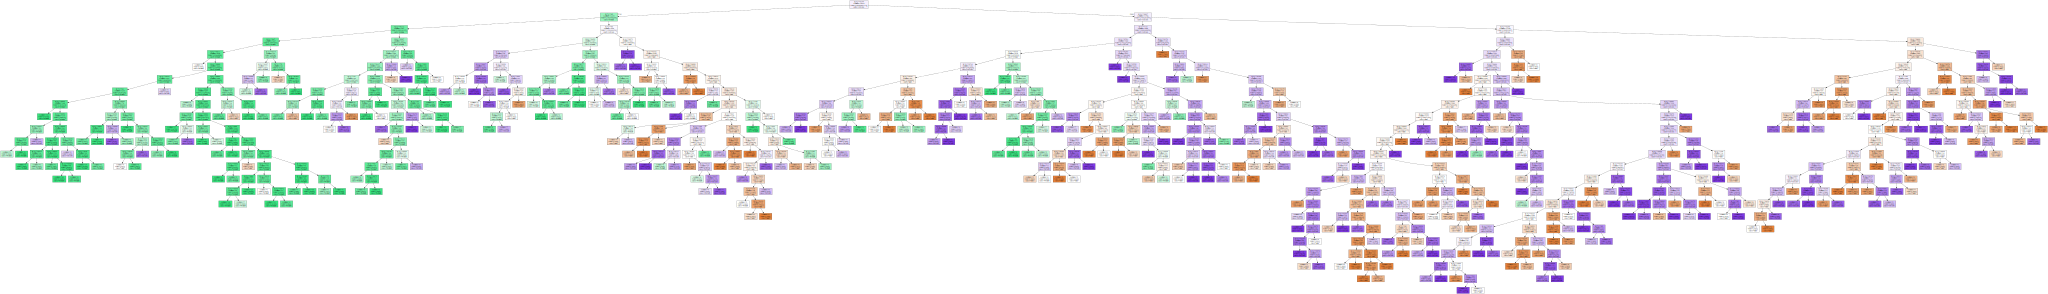

In [16]:
#graphviz #

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph)) 


In [17]:
# 트리의 특성 중요도(feature importance) #
# sum(feature importance) = 1 #

print("feature importance : {}".format(tree.feature_importances_))
print("feature importance : {}".format(np.sum(tree.feature_importances_ != 0))) 

feature importance : [0.09110696 0.05938044 0.05632451 0.12135152 0.10272309 0.35996128
 0.09355423 0.11559797]
feature importance : 8


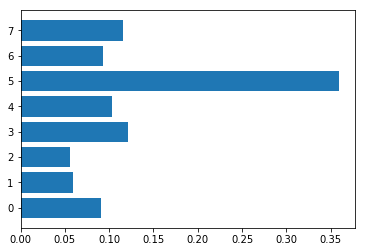

In [19]:
ab.feature_names = np.array(['Sex','Length','Diameter','Height','Whole_weight',
                             'Shucked_weight','Viscera_weight','Shell_weight','Rings'])

def plot_feature_importances_ab(tree):
    n_features = 8 
    plt.barh(np.arange(n_features),tree.feature_importances_, align ='center')

plot_feature_importances_ab(tree) 

In [21]:
tree.feature_importances_

array([0.09110696, 0.05938044, 0.05632451, 0.12135152, 0.10272309,
       0.35996128, 0.09355423, 0.11559797])

In [22]:
ab.feature_names = np.array(['Sex','Length','Diameter','Height','Whole_weight',
                             'Shucked_weight','Viscera_weight','Shell_weight','Rings'])
ab.feature_names

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='<U14')

array([0.09110696, 0.05938044, 0.05632451, 0.12135152, 0.10272309,
       0.35996128, 0.09355423, 0.11559797])